In [2]:
# ==========================================
# 🧠 AI in Software Engineering - Task 3
# Topic: Predictive Analytics for Resource Allocation
# Dataset: Kaggle Breast Cancer Dataset
# ==========================================

# 🧰 Import all the libraries we need for the project
# These are like the "tools" that will help us work with data and build an AI model

# 📊 Pandas helps us handle tables and spreadsheets easily
import pandas as pd

# 🔢 NumPy helps with numbers, arrays, and quick calculations
import numpy as np

# 🤖 Scikit-learn (sklearn) is our machine learning library
# It gives us ready-made tools for splitting data, training models, and testing them

# For splitting data into training and testing parts
from sklearn.model_selection import train_test_split

# Random Forest is a smart model that combines many decision trees to make good predictions
from sklearn.ensemble import RandomForestClassifier

# These help us measure how good our model is (accuracy, F1 score, etc.)
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 📈 (Optional for later) – for charts and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🧩 Check if all libraries loaded correctly
print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [8]:
# ==========================================
# 🧩 STEP 2: Load the Breast Cancer Dataset (Local File)
# ==========================================

# 📂 Make sure "data.csv" is in the same folder as this notebook
# If it’s in a different folder, include the full path, like:
# data = pd.read_csv("C:/Users/YourName/Desktop/data.csv")

# 🧠 Read the CSV file into a pandas DataFrame
data = pd.read_csv("data.csv")

# 👀 Show the first 5 rows to confirm it loaded correctly
print("✅ Dataset loaded successfully! Here are the first 5 rows:")
data.head()


✅ Dataset loaded successfully! Here are the first 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
# ==========================================
# 🧩 STEP 3: Load and Explore the Dataset
# ==========================================

# 🐼 Pandas helps us read the dataset into a "DataFrame" (a table in memory)
#import pandas as pd

# Let's read the CSV file we downloaded and extracted from Kaggle
# The file name is usually "data.csv"
data = pd.read_csv("data.csv")

# 👀 Let's take a peek at the first 5 rows to see what our data looks like
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# ==========================================
# 🧩 STEP 4: Understand the Data
# ==========================================

# 🧾 Show the number of rows and columns (shape)
print("The dataset has:", data.shape[0], "rows and", data.shape[1], "columns.\n")

# 🏷️ Show the column names
print("Column names in this dataset are:\n")
print(list(data.columns))


The dataset has: 569 rows and 33 columns.

Column names in this dataset are:

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [14]:
# ==========================================
# 🧩 STEP 5: Check for Missing Data (Empty Cells)
# ==========================================

# 🕳️ Sometimes datasets have missing or empty values — we want to check for those.
print("\nChecking for missing values in each column:\n")
print(data.isnull().sum())



Checking for missing values in each column:

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst          

In [15]:
# ==========================================
# 🧩 STEP 6: Drop Useless Columns
# ==========================================

# The column "id" is just a number label and not useful for prediction.
# "Unnamed: 32" is an empty column with no data (you’ll see it in the output).

data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")

print("\n✅ Removed useless columns! Here are the remaining ones:\n")
print(list(data.columns))



✅ Removed useless columns! Here are the remaining ones:

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [16]:
# ==========================================
# 🧩 STEP 7: Check Target Column (What We Want to Predict)
# ==========================================

# The target column (what we’ll predict) is "diagnosis"
# It tells if a tumor is 'M' (Malignant = cancerous) or 'B' (Benign = non-cancerous)

print("\nUnique values in diagnosis column:")
print(data["diagnosis"].value_counts())

# 👇 Let’s also replace 'M' and 'B' with numbers (so the model understands)
# M = 1 (Cancerous), B = 0 (Non-cancerous)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

print("\n✅ Target column converted to numbers:")
print(data["diagnosis"].value_counts())



Unique values in diagnosis column:
diagnosis
B    357
M    212
Name: count, dtype: int64

✅ Target column converted to numbers:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [17]:
# ==========================================
# 🧩 STEP 8: Split the Data into Features (X) and Target (y)
# ==========================================

# 🧱 Features (X) are the input columns — the details of each tumor.
# 🎯 Target (y) is what we want to predict — if it’s cancer (1) or not (0).

X = data.drop(columns=["diagnosis"])  # Drop the diagnosis column (keep all others)
y = data["diagnosis"]  # Keep only the diagnosis column

print("✅ Data split into features (X) and target (y)")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Data split into features (X) and target (y)
X shape: (569, 30)
y shape: (569,)


In [18]:
# ==========================================
# 🧩 STEP 9: Split the Data into Training and Testing Sets
# ==========================================

from sklearn.model_selection import train_test_split

# ✂️ We’ll use 80% of the data for training and 20% for testing
# random_state=42 makes sure we get the same split every time we run the code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Training and testing data created!")
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])


✅ Training and testing data created!
Training data size: 455
Testing data size: 114


In [19]:
# ==========================================
# 🧩 STEP 10: Train the Random Forest Model
# ==========================================

from sklearn.ensemble import RandomForestClassifier

# 🌲 Random Forest is made up of many small decision trees.
# Each tree gives an opinion, and the forest takes a "majority vote".
# This helps it make strong and balanced predictions.

# Create the model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 🏋️ Train the model using the training data
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [20]:
# ==========================================
# 🧩 STEP 11: Make Predictions
# ==========================================

# 🤖 Let’s see how the trained model performs on data it has never seen before (the test set)
y_pred = model.predict(X_test)

# Print the first few predictions for fun
print("🔮 First 10 Predictions:", y_pred[:10])


🔮 First 10 Predictions: [0 1 1 0 0 1 1 1 1 0]


In [21]:
# ==========================================
# 🧩 STEP 12: Evaluate the Model
# ==========================================

from sklearn.metrics import accuracy_score, f1_score, classification_report

# 🎯 Compare the model’s predictions (y_pred) with the real answers (y_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 🧾 Print out the main results
print("✅ Model Evaluation Results:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")

# 🧩 Classification report gives more detail:
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))


✅ Model Evaluation Results:
Accuracy: 96.49%
F1 Score: 0.9524

📊 Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        71
Malignant (1)       0.98      0.93      0.95        43

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114



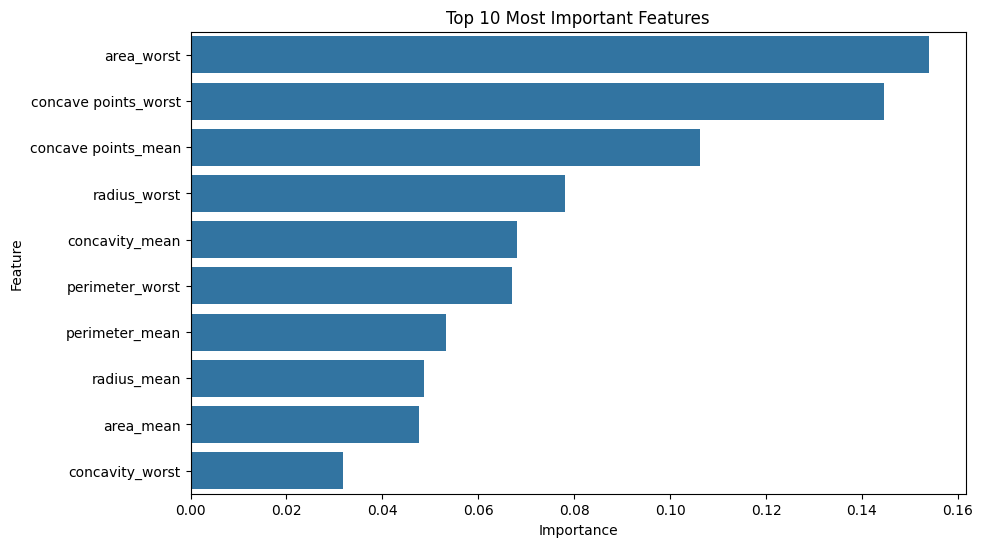

In [23]:
# ==========================================
# 🧩 STEP 13: Show Feature Importance
# ==========================================

# Get how important each feature (column) was in the model
feature_importances = model.feature_importances_

# Put them in a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 🎨 Visualize the top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features')
plt.show()
